<a href="https://colab.research.google.com/github/mimiflynn/covid-data/blob/master/covid_jhu_csse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !apt-get -qq install python-cartopy python3-cartopy

In [2]:
# import cartopy.crs as ccrs
import json
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import requests as request
import pandas as pd
import numpy as np
plt.close('all')
plt.xkcd()

In [3]:
# run all requests for summary
api = request.get('https://covid19.mathdro.id/api')
confirmed = request.get('https://covid19.mathdro.id/api/confirmed')
deaths = request.get('https://covid19.mathdro.id/api/deaths')
us_confirmed = request.get('https://covid19.mathdro.id/api/countries/USA/confirmed')
ph_confirmed = request.get('https://covid19.mathdro.id/api/countries/Philippines/confirmed')

In [4]:
today = datetime.today()
print('Last run at:')
print(today)

Last run at:
2020-11-24 23:15:03.482612


In [5]:
# state population data from https://datausa.io/api/data?drilldowns=State&measures=Population&year=latest
# included here as string because no reason to make calls on 2 year old data
us_pop = '[{"ID State":"04000US30","State":"Montana","ID Year":2018,"Year":"2018","Population":1062305,"Slug State":"montana"},{"ID State":"04000US01","State":"Alabama","ID Year":2018,"Year":"2018","Population":4887871,"Slug State":"alabama"},{"ID State":"04000US04","State":"Arizona","ID Year":2018,"Year":"2018","Population":7171646,"Slug State":"arizona"},{"ID State":"04000US05","State":"Arkansas","ID Year":2018,"Year":"2018","Population":3013825,"Slug State":"arkansas"},{"ID State":"04000US06","State":"California","ID Year":2018,"Year":"2018","Population":39557045,"Slug State":"california"},{"ID State":"04000US08","State":"Colorado","ID Year":2018,"Year":"2018","Population":5695564,"Slug State":"colorado"},{"ID State":"04000US09","State":"Connecticut","ID Year":2018,"Year":"2018","Population":3572665,"Slug State":"connecticut"},{"ID State":"04000US10","State":"Delaware","ID Year":2018,"Year":"2018","Population":967171,"Slug State":"delaware"},{"ID State":"04000US11","State":"District of Columbia","ID Year":2018,"Year":"2018","Population":702455,"Slug State":"district-of-columbia"},{"ID State":"04000US12","State":"Florida","ID Year":2018,"Year":"2018","Population":21299325,"Slug State":"florida"},{"ID State":"04000US13","State":"Georgia","ID Year":2018,"Year":"2018","Population":10519475,"Slug State":"georgia"},{"ID State":"04000US15","State":"Hawaii","ID Year":2018,"Year":"2018","Population":1420491,"Slug State":"hawaii"},{"ID State":"04000US16","State":"Idaho","ID Year":2018,"Year":"2018","Population":1754208,"Slug State":"idaho"},{"ID State":"04000US17","State":"Illinois","ID Year":2018,"Year":"2018","Population":12741080,"Slug State":"illinois"},{"ID State":"04000US18","State":"Indiana","ID Year":2018,"Year":"2018","Population":6691878,"Slug State":"indiana"},{"ID State":"04000US19","State":"Iowa","ID Year":2018,"Year":"2018","Population":3156145,"Slug State":"iowa"},{"ID State":"04000US20","State":"Kansas","ID Year":2018,"Year":"2018","Population":2911510,"Slug State":"kansas"},{"ID State":"04000US21","State":"Kentucky","ID Year":2018,"Year":"2018","Population":4468402,"Slug State":"kentucky"},{"ID State":"04000US22","State":"Louisiana","ID Year":2018,"Year":"2018","Population":4659978,"Slug State":"louisiana"},{"ID State":"04000US23","State":"Maine","ID Year":2018,"Year":"2018","Population":1338404,"Slug State":"maine"},{"ID State":"04000US24","State":"Maryland","ID Year":2018,"Year":"2018","Population":6042718,"Slug State":"maryland"},{"ID State":"04000US25","State":"Massachusetts","ID Year":2018,"Year":"2018","Population":6902149,"Slug State":"massachusetts"},{"ID State":"04000US26","State":"Michigan","ID Year":2018,"Year":"2018","Population":9995915,"Slug State":"michigan"},{"ID State":"04000US27","State":"Minnesota","ID Year":2018,"Year":"2018","Population":5611179,"Slug State":"minnesota"},{"ID State":"04000US28","State":"Mississippi","ID Year":2018,"Year":"2018","Population":2986530,"Slug State":"mississippi"},{"ID State":"04000US29","State":"Missouri","ID Year":2018,"Year":"2018","Population":6126452,"Slug State":"missouri"},{"ID State":"04000US02","State":"Alaska","ID Year":2018,"Year":"2018","Population":737438,"Slug State":"alaska"},{"ID State":"04000US31","State":"Nebraska","ID Year":2018,"Year":"2018","Population":1929268,"Slug State":"nebraska"},{"ID State":"04000US32","State":"Nevada","ID Year":2018,"Year":"2018","Population":3034392,"Slug State":"nevada"},{"ID State":"04000US33","State":"New Hampshire","ID Year":2018,"Year":"2018","Population":1356458,"Slug State":"new-hampshire"},{"ID State":"04000US34","State":"New Jersey","ID Year":2018,"Year":"2018","Population":8908520,"Slug State":"new-jersey"},{"ID State":"04000US35","State":"New Mexico","ID Year":2018,"Year":"2018","Population":2095428,"Slug State":"new-mexico"},{"ID State":"04000US36","State":"New York","ID Year":2018,"Year":"2018","Population":19542209,"Slug State":"new-york"},{"ID State":"04000US37","State":"North Carolina","ID Year":2018,"Year":"2018","Population":10383620,"Slug State":"north-carolina"},{"ID State":"04000US38","State":"North Dakota","ID Year":2018,"Year":"2018","Population":760077,"Slug State":"north-dakota"},{"ID State":"04000US39","State":"Ohio","ID Year":2018,"Year":"2018","Population":11689442,"Slug State":"ohio"},{"ID State":"04000US40","State":"Oklahoma","ID Year":2018,"Year":"2018","Population":3943079,"Slug State":"oklahoma"},{"ID State":"04000US41","State":"Oregon","ID Year":2018,"Year":"2018","Population":4190713,"Slug State":"oregon"},{"ID State":"04000US42","State":"Pennsylvania","ID Year":2018,"Year":"2018","Population":12807060,"Slug State":"pennsylvania"},{"ID State":"04000US44","State":"Rhode Island","ID Year":2018,"Year":"2018","Population":1057315,"Slug State":"rhode-island"},{"ID State":"04000US45","State":"South Carolina","ID Year":2018,"Year":"2018","Population":5084127,"Slug State":"south-carolina"},{"ID State":"04000US46","State":"South Dakota","ID Year":2018,"Year":"2018","Population":882235,"Slug State":"south-dakota"},{"ID State":"04000US47","State":"Tennessee","ID Year":2018,"Year":"2018","Population":6770010,"Slug State":"tennessee"},{"ID State":"04000US48","State":"Texas","ID Year":2018,"Year":"2018","Population":28701845,"Slug State":"texas"},{"ID State":"04000US49","State":"Utah","ID Year":2018,"Year":"2018","Population":3161105,"Slug State":"utah"},{"ID State":"04000US50","State":"Vermont","ID Year":2018,"Year":"2018","Population":626299,"Slug State":"vermont"},{"ID State":"04000US51","State":"Virginia","ID Year":2018,"Year":"2018","Population":8517685,"Slug State":"virginia"},{"ID State":"04000US53","State":"Washington","ID Year":2018,"Year":"2018","Population":7535591,"Slug State":"washington"},{"ID State":"04000US54","State":"West Virginia","ID Year":2018,"Year":"2018","Population":1805832,"Slug State":"west-virginia"},{"ID State":"04000US55","State":"Wisconsin","ID Year":2018,"Year":"2018","Population":5813568,"Slug State":"wisconsin"},{"ID State":"04000US56","State":"Wyoming","ID Year":2018,"Year":"2018","Population":577737,"Slug State":"wyoming"},{"ID State":"04000US72","State":"Puerto Rico","ID Year":2018,"Year":"2018","Population":3195153,"Slug State":"puerto-rico"}]'
pop = pd.DataFrame.from_dict(json.loads(us_pop))

In [6]:
# All States
states = pop['State'].tolist()
states.sort()

In [7]:
us = pd.DataFrame.from_dict(us_confirmed.json())

In [8]:
def state_chart(state_name, deaths_perc_of_confirmed):
    labels = 'Confirmed', 'Deaths'
    sizes = [100 - deaths_perc_of_confirmed, deaths_perc_of_confirmed]
    explode = (0, 0.1)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    plt.title('{0} State Confirmed Cases'.format(state_name))
    ax1.axis('equal')

    plt.show()

In [9]:
def state_details(state_name):
    state = us.loc[us['provinceState'] == state_name]
    p = pop.loc[pop['State'] == state_name]

    population = p['Population'].sum()
    confirmed = state['confirmed'].sum()
    deaths = state['deaths'].sum()

    confirmed_perc_of_pop = (confirmed/population) * 100
    deaths_perc_of_confirmed = (deaths/confirmed) * 100

    state_chart(state_name, deaths_perc_of_confirmed)

    print('{0} State Total Population'.format(state_name))
    print(p['Population'].sum())
    print('{0} State Confirmed'.format(state_name))
    print('{0} ({1}% of population)'.format(confirmed, confirmed_perc_of_pop))
    print('{0} State Deaths'.format(state_name))
    print('{0} ({1}% of confirmed)'.format(deaths, deaths_perc_of_confirmed))
    print('')

In [10]:
def us_details():
    population = pop['Population'].sum()
    confirmed = us['confirmed'].sum()
    deaths = us['deaths'].sum()

    confirmed_perc_of_pop = (confirmed/population) * 100
    deaths_perc_of_confirmed = (deaths/confirmed) * 100

    labels = 'Confirmed', 'Deaths'
    sizes = [100 - deaths_perc_of_confirmed, deaths_perc_of_confirmed]
    explode = (0, 0.1)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    plt.title('US Confirmed Cases')
    ax1.axis('equal')

    plt.show()

    print('US Population')
    print(pop['Population'].sum())
    print('US Confirmed')
    print('{0} ({1}% of population)'.format(confirmed, confirmed_perc_of_pop))
    print('US Deaths')
    print(us['deaths'].sum())
    print('')

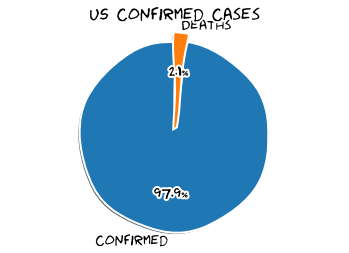

US Population
330362592
US Confirmed
12546670 (3.79784827454072% of population)
US Deaths
258935

New York City Confirmed
298275 (3.577804334675932% of population)
New York City Deaths
24203

Philippines Confirmed
421722
Philippines Deaths
8185



In [11]:
# quick summary
us_details()

ny = us.loc[us['provinceState'] == 'New York']
nyc = ny.loc[(ny['admin2'] == 'Queens') | (ny['admin2'] == 'Kings') | (ny['admin2'] == 'New York') | (ny['admin2'] == 'Bronx') | (ny['admin2'] == 'Richmond')]
nyc_confirmed = nyc['confirmed'].sum()
nyc_deaths = nyc['deaths'].sum()
# from https://www.census.gov/quickfacts/newyorkcitynewyork
nyc_population = 8336817

nyc_confirmed_perc_of_pop = (nyc_confirmed/nyc_population) * 100
nyc_deaths_perc_of_confirmed = (nyc_deaths/nyc_confirmed) * 100

print('New York City Confirmed')
print('{0} ({1}% of population)'.format(nyc_confirmed, nyc_confirmed_perc_of_pop))
print('New York City Deaths')
print(nyc_deaths)
print('')

# create a dataframe of all comfirmed cases
global_confirmed = pd.DataFrame.from_dict(confirmed.json())

ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
print('Philippines Confirmed')
print(ph['confirmed'].sum())
print('Philippines Deaths')
print(ph['deaths'].sum())
print('')

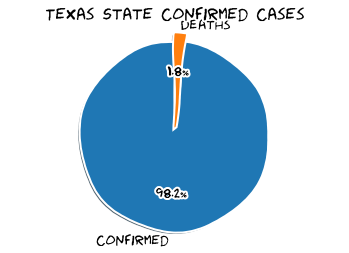

Texas State Total Population
28701845
Texas State Confirmed
1159863 (4.041074711399214% of population)
Texas State Deaths
21049 (1.814783297682571% of confirmed)



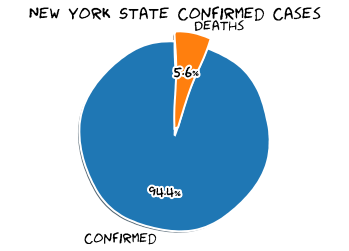

New York State Total Population
19542209
New York State Confirmed
607001 (3.106102283523833% of population)
New York State Deaths
34225 (5.638376213548248% of confirmed)



In [12]:
state_details('Texas')
state_details('New York')

In [13]:
ny

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
10,New York,US,1606256758000,40.710881,-73.816847,86684,0,7343,79341,Queens,36081,"Queens, New York, US",3846.027567,None,None,84036081,USA
11,New York,US,1606256758000,40.636182,-73.949356,85561,0,7489,78072,Kings,36047,"Kings, New York, US",3342.353206,None,None,84036047,USA
21,New York,US,1606256758000,40.852093,-73.862828,61617,0,5030,56587,Bronx,36005,"Bronx, New York, US",4344.711315,None,None,84036005,USA
24,New York,US,1606256758000,40.740665,-73.589419,57489,0,2244,55245,Nassau,36059,"Nassau, New York, US",4236.714805,None,None,84036059,USA
25,New York,US,1606256758000,40.883201,-72.801217,57366,0,2036,55330,Suffolk,36103,"Suffolk, New York, US",3885.003464,None,None,84036103,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2705,New York,US,1606256758000,44.116308,-73.772978,252,0,14,238,Essex,36031,"Essex, New York, US",683.204555,None,None,84036031,USA
2726,New York,US,1606256758000,44.590409,-74.299260,243,0,6,237,Franklin,36033,"Franklin, New York, US",485.786254,None,None,84036033,USA
2728,New York,US,1606256758000,42.635055,-77.103699,242,0,7,235,Yates,36123,"Yates, New York, US",971.380404,None,None,84036123,USA
2887,New York,US,1606256758000,42.588317,-74.443390,176,0,2,174,Schoharie,36095,"Schoharie, New York, US",567.760250,None,None,84036095,USA


In [14]:
nyc

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
10,New York,US,1606256758000,40.710881,-73.816847,86684,0,7343,79341,Queens,36081,"Queens, New York, US",3846.027567,None,None,84036081,USA
11,New York,US,1606256758000,40.636182,-73.949356,85561,0,7489,78072,Kings,36047,"Kings, New York, US",3342.353206,None,None,84036047,USA
21,New York,US,1606256758000,40.852093,-73.862828,61617,0,5030,56587,Bronx,36005,"Bronx, New York, US",4344.711315,None,None,84036005,USA
33,New York,US,1606256758000,40.767273,-73.971526,42981,0,3222,39759,New York,36061,"New York, New York, US",2638.966149,None,None,84036061,USA
115,New York,US,1606256758000,40.585822,-74.148086,21432,0,1119,20313,Richmond,36085,"Richmond, New York, US",4501.168767,None,None,84036085,USA


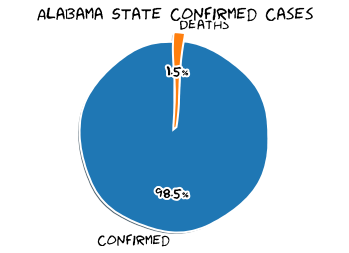

Alabama State Total Population
4887871
Alabama State Confirmed
236865 (4.845974863084561% of population)
Alabama State Deaths
3472 (1.4658138602157347% of confirmed)



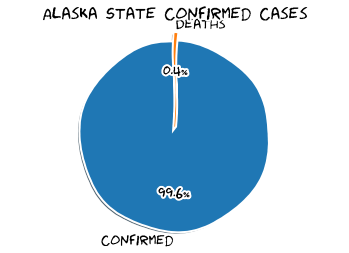

Alaska State Total Population
737438
Alaska State Confirmed
28841 (3.9109728546671043% of population)
Alaska State Deaths
112 (0.38833604937415483% of confirmed)



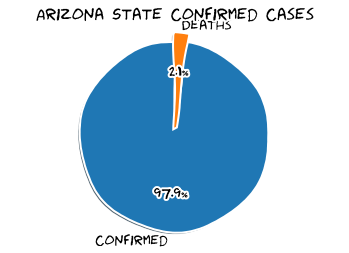

Arizona State Total Population
7171646
Arizona State Confirmed
306868 (4.278906125595157% of population)
Arizona State Deaths
6515 (2.1230626849329353% of confirmed)



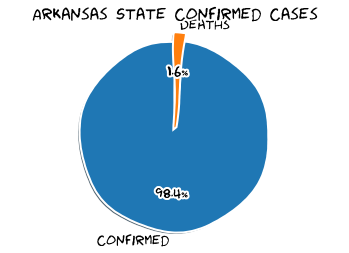

Arkansas State Total Population
3013825
Arkansas State Confirmed
146190 (4.850646603568555% of population)
Arkansas State Deaths
2387 (1.63280662151994% of confirmed)



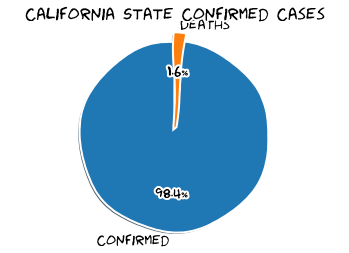

California State Total Population
39557045
California State Confirmed
1138867 (2.8790497369052717% of population)
California State Deaths
18786 (1.649534142265954% of confirmed)



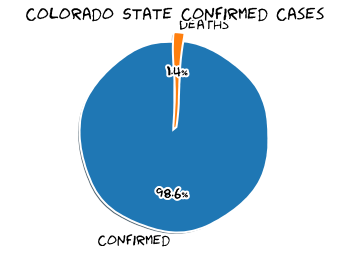

Colorado State Total Population
5695564
Colorado State Confirmed
202289 (3.551693914772971% of population)
Colorado State Deaths
2810 (1.3891017306922275% of confirmed)



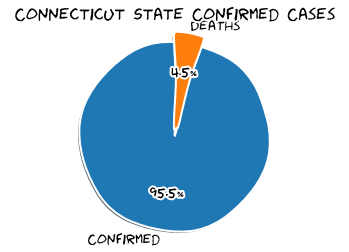

Connecticut State Total Population
3572665
Connecticut State Confirmed
107280 (3.002800430490964% of population)
Connecticut State Deaths
4881 (4.549776286353468% of confirmed)



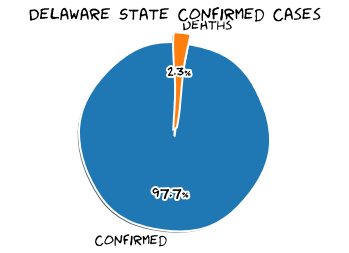

Delaware State Total Population
967171
Delaware State Confirmed
32664 (3.3772724781863808% of population)
Delaware State Deaths
757 (2.3175361253979916% of confirmed)



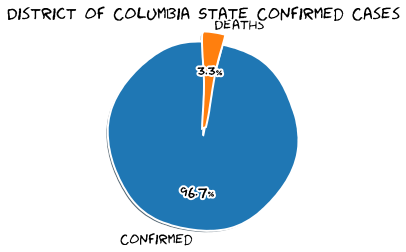

District of Columbia State Total Population
702455
District of Columbia State Confirmed
20409 (2.905381839406083% of population)
District of Columbia State Deaths
673 (3.2975647998432063% of confirmed)



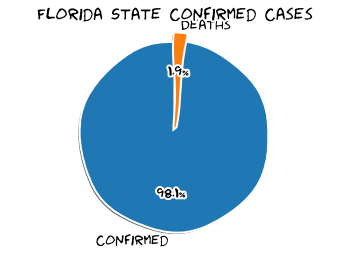

Florida State Total Population
21299325
Florida State Confirmed
953300 (4.475728690932694% of population)
Florida State Deaths
18157 (1.9046470156299171% of confirmed)



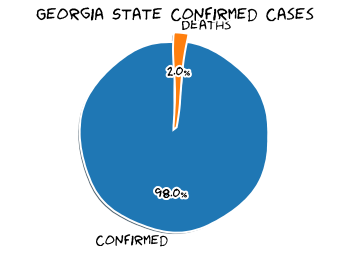

Georgia State Total Population
10519475
Georgia State Confirmed
454732 (4.322763255770845% of population)
Georgia State Deaths
9221 (2.027787795888567% of confirmed)



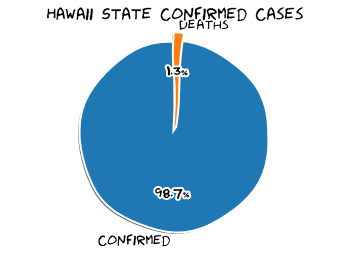

Hawaii State Total Population
1420491
Hawaii State Confirmed
17656 (1.2429505009183444% of population)
Hawaii State Deaths
233 (1.3196647032170368% of confirmed)



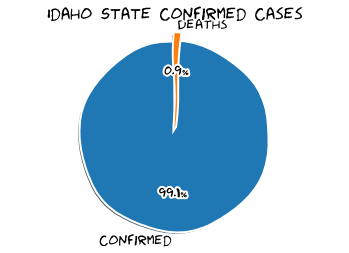

Idaho State Total Population
1754208
Idaho State Confirmed
93090 (5.306668308433207% of population)
Idaho State Deaths
866 (0.9302825222902567% of confirmed)



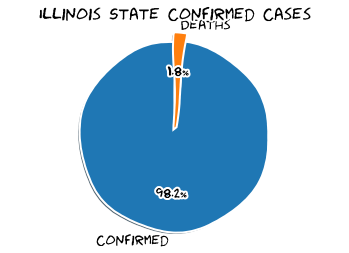

Illinois State Total Population
12741080
Illinois State Confirmed
674089 (5.290673946007717% of population)
Illinois State Deaths
12261 (1.8188992848125398% of confirmed)



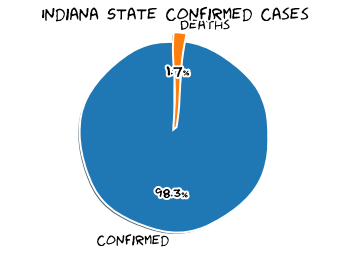

Indiana State Total Population
6691878
Indiana State Confirmed
306538 (4.580746989111278% of population)
Indiana State Deaths
5169 (1.6862509705158906% of confirmed)



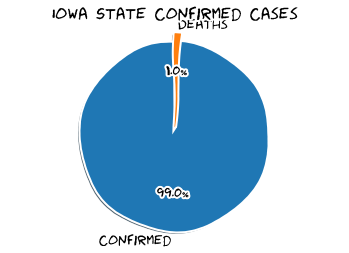

Iowa State Total Population
3156145
Iowa State Confirmed
216117 (6.847499085118079% of population)
Iowa State Deaths
2226 (1.0299976401671316% of confirmed)



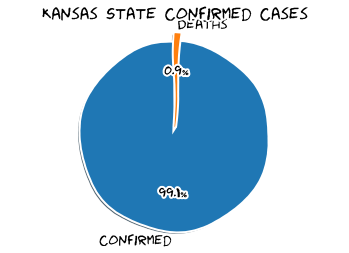

Kansas State Total Population
2911510
Kansas State Confirmed
144908 (4.977073752108012% of population)
Kansas State Deaths
1363 (0.940596792447622% of confirmed)



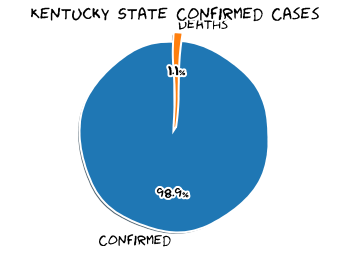

Kentucky State Total Population
4468402
Kentucky State Confirmed
162838 (3.644211062478264% of population)
Kentucky State Deaths
1809 (1.1109200555152974% of confirmed)



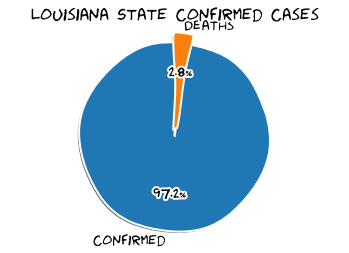

Louisiana State Total Population
4659978
Louisiana State Confirmed
224403 (4.815537755757645% of population)
Louisiana State Deaths
6323 (2.8176985156169927% of confirmed)



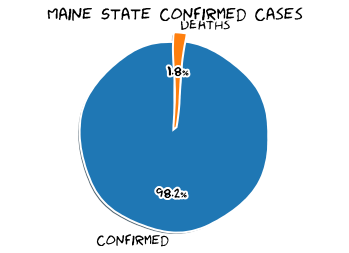

Maine State Total Population
1338404
Maine State Confirmed
10799 (0.8068565246368062% of population)
Maine State Deaths
189 (1.7501620520418557% of confirmed)



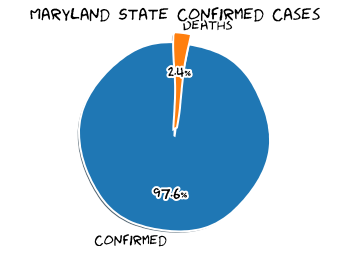

Maryland State Total Population
6042718
Maryland State Confirmed
185464 (3.069214879794159% of population)
Maryland State Deaths
4453 (2.4010050468015356% of confirmed)



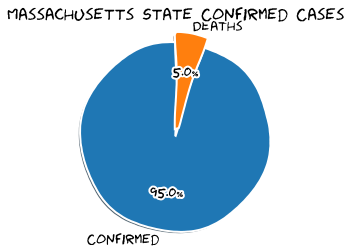

Massachusetts State Total Population
6902149
Massachusetts State Confirmed
211199 (3.059902068181953% of population)
Massachusetts State Deaths
10551 (4.9957622905411485% of confirmed)



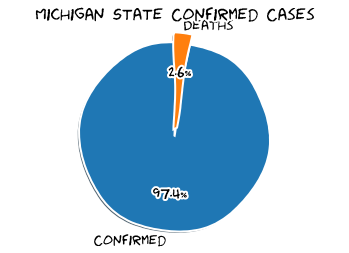

Michigan State Total Population
9995915
Michigan State Confirmed
347746 (3.478881122938721% of population)
Michigan State Deaths
9094 (2.615127133022378% of confirmed)



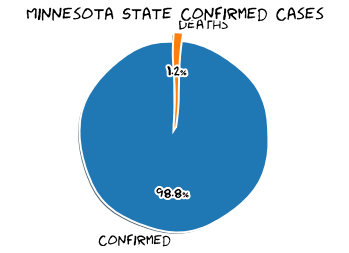

Minnesota State Total Population
5611179
Minnesota State Confirmed
282916 (5.042006323448245% of population)
Minnesota State Deaths
3359 (1.1872782027174142% of confirmed)



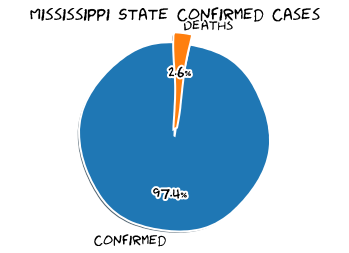

Mississippi State Total Population
2986530
Mississippi State Confirmed
144544 (4.8398643241487616% of population)
Mississippi State Deaths
3729 (2.579837281381448% of confirmed)



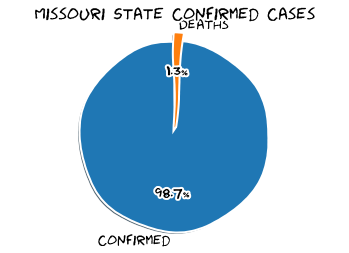

Missouri State Total Population
6126452
Missouri State Confirmed
284456 (4.643078897867803% of population)
Missouri State Deaths
3769 (1.3249852349748292% of confirmed)



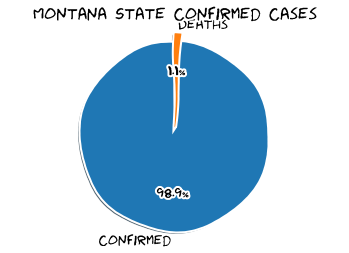

Montana State Total Population
1062305
Montana State Confirmed
57504 (5.4131346458879515% of population)
Montana State Deaths
630 (1.095575959933222% of confirmed)



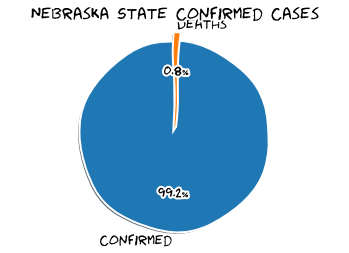

Nebraska State Total Population
1929268
Nebraska State Confirmed
115921 (6.008548319880909% of population)
Nebraska State Deaths
934 (0.8057211376713452% of confirmed)



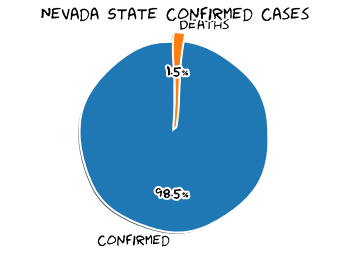

Nevada State Total Population
3034392
Nevada State Confirmed
139080 (4.583455268798494% of population)
Nevada State Deaths
2047 (1.4718147828587862% of confirmed)



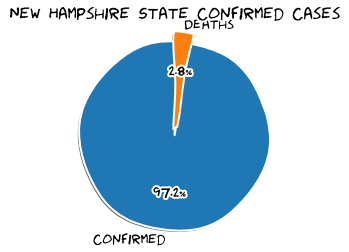

New Hampshire State Total Population
1356458
New Hampshire State Confirmed
18082 (1.333030584065264% of population)
New Hampshire State Deaths
512 (2.831545183054972% of confirmed)



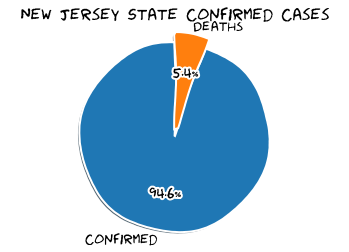

New Jersey State Total Population
8908520
New Jersey State Confirmed
313863 (3.5231778118026336% of population)
New Jersey State Deaths
16819 (5.358707461535766% of confirmed)



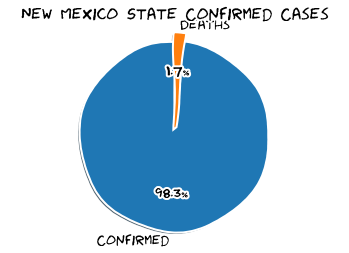

New Mexico State Total Population
2095428
New Mexico State Confirmed
84148 (4.015790568800264% of population)
New Mexico State Deaths
1400 (1.663735323477682% of confirmed)



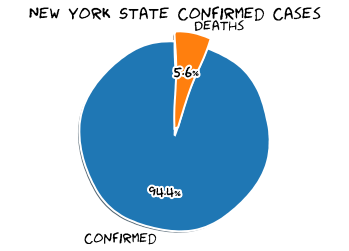

New York State Total Population
19542209
New York State Confirmed
607001 (3.106102283523833% of population)
New York State Deaths
34225 (5.638376213548248% of confirmed)



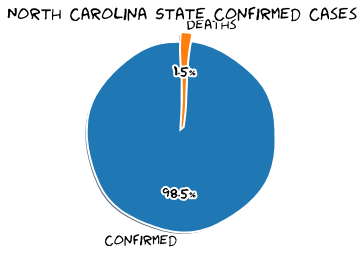

North Carolina State Total Population
10383620
North Carolina State Confirmed
342294 (3.296480418197122% of population)
North Carolina State Deaths
5074 (1.4823514288886164% of confirmed)



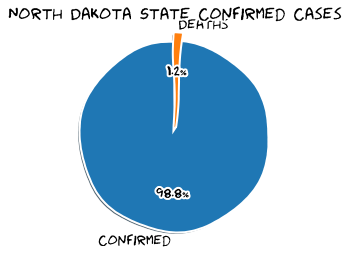

North Dakota State Total Population
760077
North Dakota State Confirmed
74401 (9.788613522051055% of population)
North Dakota State Deaths
883 (1.1868120052149835% of confirmed)



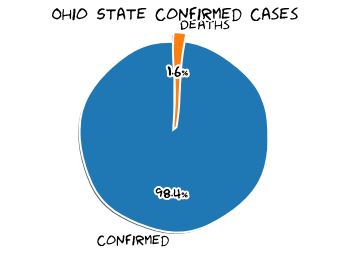

Ohio State Total Population
11689442
Ohio State Confirmed
371840 (3.1809901618913887% of population)
Ohio State Deaths
6100 (1.6404905335628228% of confirmed)



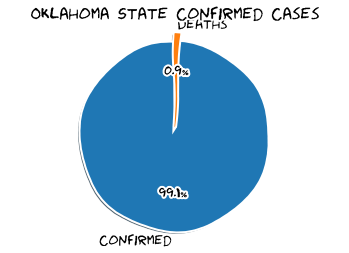

Oklahoma State Total Population
3943079
Oklahoma State Confirmed
180610 (4.580430673592895% of population)
Oklahoma State Deaths
1664 (0.9213221859254748% of confirmed)



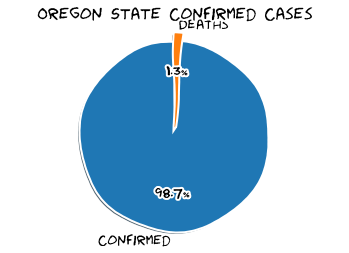

Oregon State Total Population
4190713
Oregon State Confirmed
67333 (1.6067194293667926% of population)
Oregon State Deaths
847 (1.2579270194406904% of confirmed)



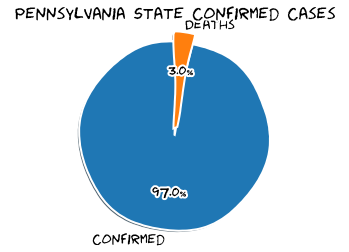

Pennsylvania State Total Population
12807060
Pennsylvania State Confirmed
326513 (2.549476616803544% of population)
Pennsylvania State Deaths
9924 (3.039388937040792% of confirmed)



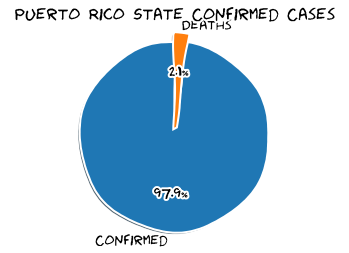

Puerto Rico State Total Population
3195153
Puerto Rico State Confirmed
48548 (1.519426456260467% of population)
Puerto Rico State Deaths
1038 (2.1380901375957815% of confirmed)



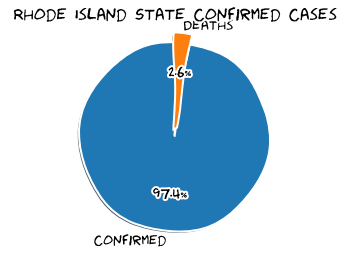

Rhode Island State Total Population
1057315
Rhode Island State Confirmed
51424 (4.863640447737902% of population)
Rhode Island State Deaths
1325 (2.5766179215930305% of confirmed)



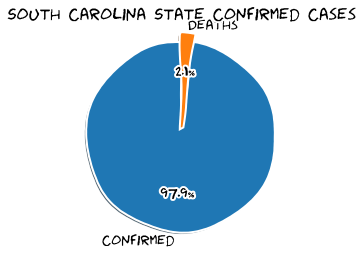

South Carolina State Total Population
5084127
South Carolina State Confirmed
209230 (4.115357464516524% of population)
South Carolina State Deaths
4313 (2.0613678726760023% of confirmed)



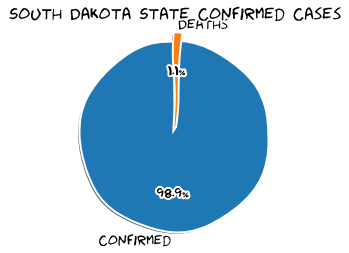

South Dakota State Total Population
882235
South Dakota State Confirmed
74859 (8.485154182275698% of population)
South Dakota State Deaths
821 (1.096728516277268% of confirmed)



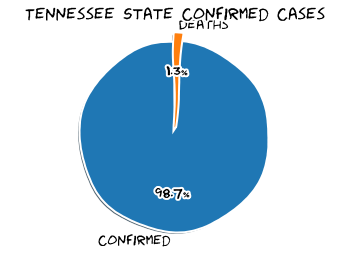

Tennessee State Total Population
6770010
Tennessee State Confirmed
345916 (5.109534550170531% of population)
Tennessee State Deaths
4372 (1.2638906555348697% of confirmed)



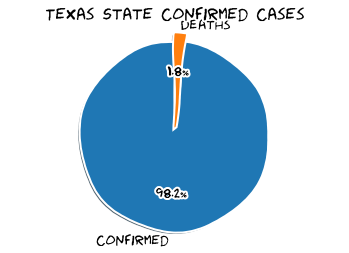

Texas State Total Population
28701845
Texas State Confirmed
1159863 (4.041074711399214% of population)
Texas State Deaths
21049 (1.814783297682571% of confirmed)



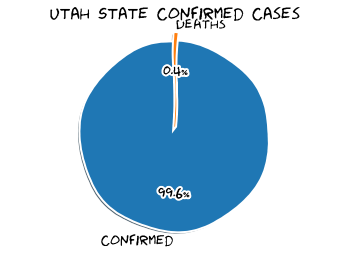

Utah State Total Population
3161105
Utah State Confirmed
182121 (5.761308150156354% of population)
Utah State Deaths
808 (0.44366108246715097% of confirmed)



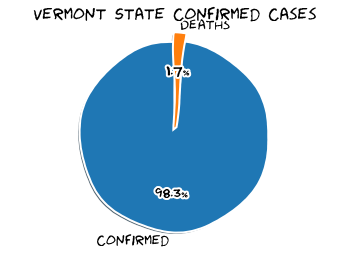

Vermont State Total Population
626299
Vermont State Confirmed
3762 (0.6006715642209232% of population)
Vermont State Deaths
64 (1.701222753854333% of confirmed)



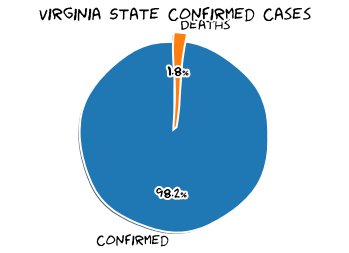

Virginia State Total Population
8517685
Virginia State Confirmed
223582 (2.624915103106067% of population)
Virginia State Deaths
3979 (1.779660258875938% of confirmed)



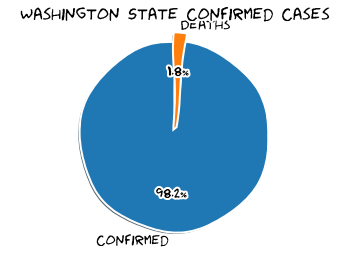

Washington State Total Population
7535591
Washington State Confirmed
147537 (1.9578689979326107% of population)
Washington State Deaths
2655 (1.7995485878118709% of confirmed)



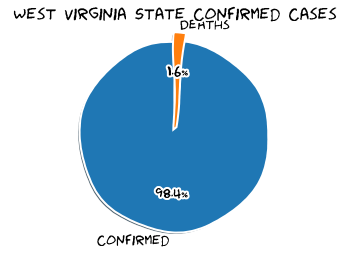

West Virginia State Total Population
1805832
West Virginia State Confirmed
42083 (2.330393967988163% of population)
West Virginia State Deaths
682 (1.6206068958962052% of confirmed)



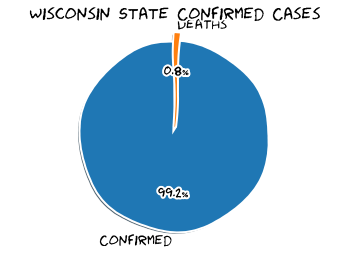

Wisconsin State Total Population
5813568
Wisconsin State Confirmed
386441 (6.647225937668572% of population)
Wisconsin State Deaths
3272 (0.8467010488017577% of confirmed)



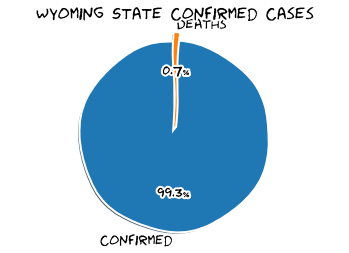

Wyoming State Total Population
577737
Wyoming State Confirmed
29431 (5.094186455082503% of population)
Wyoming State Deaths
202 (0.6863511263633584% of confirmed)



In [15]:
for i in states:
    state_details(i)

In [16]:
# show api endpoints
api.json()

{'confirmed': {'detail': 'https://covid19.mathdro.id/api/confirmed',
  'value': 59597658},
 'countries': 'https://covid19.mathdro.id/api/countries',
 'countryDetail': {'example': 'https://covid19.mathdro.id/api/countries/USA',
  'pattern': 'https://covid19.mathdro.id/api/countries/[country]'},
 'dailySummary': 'https://covid19.mathdro.id/api/daily',
 'dailyTimeSeries': {'example': 'https://covid19.mathdro.id/api/daily/2-14-2020',
  'pattern': 'https://covid19.mathdro.id/api/daily/[dateString]'},
 'deaths': {'detail': 'https://covid19.mathdro.id/api/deaths',
  'value': 1405788},
 'image': 'https://covid19.mathdro.id/api/og',
 'lastUpdate': '2020-11-24T22:25:58.000Z',
 'recovered': {'detail': 'https://covid19.mathdro.id/api/recovered',
  'value': 38097904},
 'source': 'https://github.com/mathdroid/covid19'}

In [17]:
# get date
yesterday = today - timedelta(days=1)
date = yesterday.strftime('%m-%d-%Y').lstrip('0').replace(' 0', '')

In [18]:
# Get yesterday's data
r = request.get('https://covid19.mathdro.id/api/daily/{}'.format(date))
print(r)
j = r.json()
df = pd.DataFrame.from_dict(j)
df

<Response [200]>


,fips,admin2,provinceState,countryRegion,lastUpdate,lat,long,confirmed,deaths,recovered,active,combinedKey,incidentRate,caseFatalityRatio
0,,,,Afghanistan,2020-11-24 05:27:31,33.93911,67.709953,44988,1695,35976,7317,Afghanistan,115.56618865417356,3.767671379034409
1,,,,Albania,2020-11-24 05:27:31,41.1533,20.1683,33556,716,16230,16610,Albania,1166.0296059489888,2.1337465728930742
2,,,,Algeria,2020-11-24 05:27:31,28.0339,1.6596,75867,2294,49421,24152,Algeria,173.01070809193752,3.0237125495933674
3,,,,Andorra,2020-11-24 05:27:31,42.5063,1.5218,6304,76,5405,823,Andorra,8158.933540412865,1.2055837563451777
4,,,,Angola,2020-11-24 05:27:31,-11.2027,17.8739,14634,337,7351,6946,Angola,44.525895060552656,2.302856361896952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3970,,,,West Bank and Gaza,2020-11-24 05:27:31,31.9522,35.2332,73196,645,59538,13013,West Bank and Gaza,1434.8173134674764,0.8811956937537571
3971,,,,Western Sahara,2020-11-24 05:27:31,24.2155,-12.8858,10,1,8,1,Western Sahara,1.674116485025028,10.0
3972,,,,Yemen,2020-11-24 05:27:31,15.552727,48.516388,2107,609,1459,39,Yemen,7.064313889158602,28.903654485049834
3973,,,,Zambia,2020-11-24 05:27:31,-13.133897,27.849332,17454,357,16701,396,Zambia,94.94148049527534,2.045376418013063


In [19]:
# get all US confirmed cases
us = pd.DataFrame.from_dict(us_confirmed.json())
us

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,California,US,1606256758000,34.308284,-118.228241,370769,0,7456,363313,Los Angeles,06037,"Los Angeles, California, US",3693.246820,None,None,84006037,USA
1,Illinois,US,1606256758000,41.841448,-87.816588,287124,0,6389,280735,Cook,17031,"Cook, Illinois, US",5574.971074,None,None,84017031,USA
2,Florida,US,1606256758000,25.611236,-80.551706,218294,0,3789,214505,Miami-Dade,12086,"Miami-Dade, Florida, US",8034.553579,None,None,84012086,USA
3,Arizona,US,1606256758000,33.348359,-112.491815,194410,0,3922,190488,Maricopa,04013,"Maricopa, Arizona, US",4334.271039,None,None,84004013,USA
4,Texas,US,1606256758000,29.858649,-95.393395,183252,0,2965,180287,Harris,48201,"Harris, Texas, US",3887.955955,None,None,84048201,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,Texas,US,1606256758000,32.743640,-101.431651,5,0,0,5,Borden,48033,"Borden, Texas, US",764.525994,None,None,84048033,USA
3236,Oregon,US,1606256758000,44.726982,-120.028143,3,0,0,3,Wheeler,41069,"Wheeler, Oregon, US",225.225225,None,None,84041069,USA
3237,Idaho,US,1606256758000,NaN,NaN,2,0,0,2,Unassigned,90016,"Unassigned, Idaho, US",NaN,None,None,84090016,USA
3238,Texas,US,1606256758000,33.616438,-100.255806,1,0,0,1,King,48269,"King, Texas, US",367.647059,None,None,84048269,USA


In [20]:
# return only New York state
ny = us.loc[us['provinceState'] == 'New York']
ny

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
10,New York,US,1606256758000,40.710881,-73.816847,86684,0,7343,79341,Queens,36081,"Queens, New York, US",3846.027567,None,None,84036081,USA
11,New York,US,1606256758000,40.636182,-73.949356,85561,0,7489,78072,Kings,36047,"Kings, New York, US",3342.353206,None,None,84036047,USA
21,New York,US,1606256758000,40.852093,-73.862828,61617,0,5030,56587,Bronx,36005,"Bronx, New York, US",4344.711315,None,None,84036005,USA
24,New York,US,1606256758000,40.740665,-73.589419,57489,0,2244,55245,Nassau,36059,"Nassau, New York, US",4236.714805,None,None,84036059,USA
25,New York,US,1606256758000,40.883201,-72.801217,57366,0,2036,55330,Suffolk,36103,"Suffolk, New York, US",3885.003464,None,None,84036103,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2705,New York,US,1606256758000,44.116308,-73.772978,252,0,14,238,Essex,36031,"Essex, New York, US",683.204555,None,None,84036031,USA
2726,New York,US,1606256758000,44.590409,-74.299260,243,0,6,237,Franklin,36033,"Franklin, New York, US",485.786254,None,None,84036033,USA
2728,New York,US,1606256758000,42.635055,-77.103699,242,0,7,235,Yates,36123,"Yates, New York, US",971.380404,None,None,84036123,USA
2887,New York,US,1606256758000,42.588317,-74.443390,176,0,2,174,Schoharie,36095,"Schoharie, New York, US",567.760250,None,None,84036095,USA


In [21]:
ny_total_confirmed = ny['confirmed'].sum()
ny_total_confirmed

607001

In [22]:
# return only New York City
nyc = ny.loc[ny['admin2'] == 'New York City']
nyc

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3


In [23]:
# show all Philippines confirmed
# ph = pd.DataFrame.from_dict(ph_confirmed.json())
ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
ph


,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3,iso2
23,None,Philippines,1606256758000,12.879721,121.774017,421722,386792,8185,26745.0,None,None,Philippines,384.849265,None,None,608,PHL,PH


In [24]:
pop
pop.loc[pop['State'] == 'Texas']

,ID State,State,ID Year,Year,Population,Slug State
43,04000US48,Texas,2018,2018,28701845,texas
